# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [3]:
regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/supermarket_sales.csv', encoding='windows-1254')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [4]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [5]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [6]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [7]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. Ai fini del progetto la colonna Rating acquisisce un significato differente rispetto a quello originale del dataset: essa dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [9]:
# codice per calcolare la media, mediana e moda della label "Rating"
# Estrai la colonna "Rating"
ratings = regression_dataset['Rating'].values

# Calcolo della media
mean_rating = np.mean(ratings)

# Calcolo della mediana
median_rating = np.median(ratings)

# Calcolo della moda
from scipy import stats
mode_rating = stats.mode(ratings, keepdims=True).mode[0]

# Stampa dei risultati
print(f"Media del Rating: {mean_rating:.2f}")
print(f"Mediana del Rating: {median_rating:.2f}")
print(f"Moda del Rating: {mode_rating:.2f}")

Media del Rating: 6.97
Mediana del Rating: 7.00
Moda del Rating: 6.00


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [10]:
# codice per calcolare la deviazione standard della label "Rating"
std_rating = np.std(ratings)

# Stampa del risultato
print(f"Deviazione standard del Rating: {std_rating:.2f}")

Deviazione standard del Rating: 1.72


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

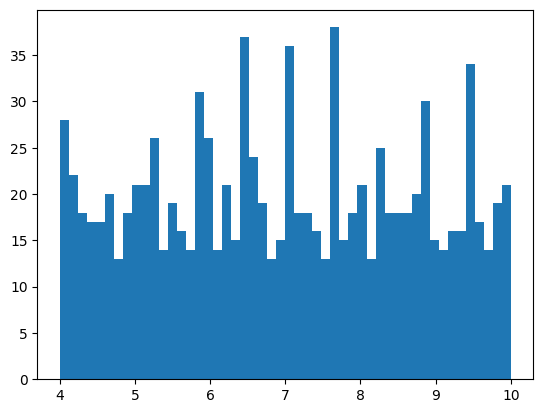

In [11]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

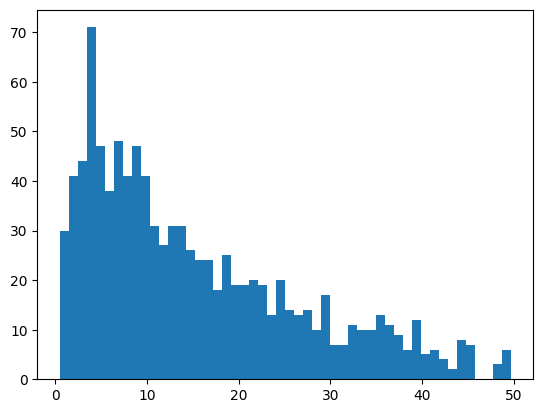

In [12]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [13]:
# Codice per calcolare la skewness del gross income
from scipy.stats import skew
skewness_value = skew(regression_dataset['gross income'])

# Stampa il risultato
print(f"Skewness del reddito lordo: {skewness_value:.2f}")

Skewness del reddito lordo: 0.89


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [14]:
# codice per effettuare l'enconding delle variabili categoriche
# One-hot encoding con drop_first per evitare multicollinearità
dataset_encoded_onehot = pd.get_dummies(
    regression_dataset,
    columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'],
    drop_first=True
)

# Visualizza le prime righe del nuovo dataset
print(dataset_encoded_onehot.head())

   Unit price  Quantity  gross income  Rating  Branch_B  Branch_C  \
0       74.69         7       26.1415     9.1     False     False   
1       15.28         5        3.8200     9.6     False      True   
2       46.33         7       16.2155     7.4     False     False   
3       58.22         8       23.2880     8.4     False     False   
4       86.31         7       30.2085     5.3     False     False   

   City_Naypyitaw  City_Yangon  Customer type_Normal  Gender_Male  \
0           False         True                 False        False   
1            True        False                  True        False   
2           False         True                  True         True   
3           False         True                 False         True   
4           False         True                  True         True   

   Product line_Fashion accessories  Product line_Food and beverages  \
0                             False                            False   
1                         

# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [18]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"
from sklearn.preprocessing import StandardScaler

# Crea un oggetto StandardScaler
scaler = StandardScaler()

# Seleziona le colonne da standardizzare
columns_to_standardize = ['Unit price', 'gross income']

# Applica la standardizzazione a queste colonne
dataset_encoded_onehot[columns_to_standardize] = scaler.fit_transform(dataset_encoded_onehot[columns_to_standardize])

# Mostra i primi 5 valori per verificare la standardizzazione
print("Primi 5 valori delle colonne standardizzate:")
print(dataset_encoded_onehot[columns_to_standardize].head())
print("\n")

# Controlla le prime righe del dataset completo
print("Primi 5 valori del dataset completo:")
print(dataset_encoded_onehot.head())
print("\n")

# Controlla le statistiche delle colonne standardizzate
print("Statistiche delle colonne standardizzate:")
print(dataset_encoded_onehot[columns_to_standardize].describe())

Primi 5 valori delle colonne standardizzate:
   Unit price  gross income
0    0.718160      0.919607
1   -1.525303     -0.987730
2   -0.352781      0.071446
3    0.096214      0.675780
4    1.156959      1.267125


Primi 5 valori del dataset completo:
   Unit price  Quantity  gross income  Rating  Branch_B  Branch_C  \
0    0.718160         7      0.919607     9.1     False     False   
1   -1.525303         5     -0.987730     9.6     False      True   
2   -0.352781         7      0.071446     7.4     False     False   
3    0.096214         8      0.675780     8.4     False     False   
4    1.156959         7      1.267125     5.3     False     False   

   City_Naypyitaw  City_Yangon  Customer type_Normal  Gender_Male  \
0           False         True                 False        False   
1            True        False                  True        False   
2           False         True                  True         True   
3           False         True                 False     

# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [19]:
from sklearn.model_selection import train_test_split

# Rinomino il dataset trasformato (One-Hot encoded, standardizzato ecc.) con un nome più semplice, uso .copy per evitare modifiche accidentali all'originale.
dataset_encoded = dataset_encoded_onehot.copy()

# Codice per splittare il dataset in training set e test set
# Definisci le feature (X) e la label (y)
X = dataset_encoded.drop(columns=['Rating'])  # Tutto tranne la colonna target
y = dataset_encoded['Rating']  # La colonna target è il label

# Split 80:20 tra train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stampa per controllo
print("Dimensioni di X_train:", X_train.shape)
print("Dimensioni di X_test:", X_test.shape)
print("Dimensioni di y_train:", y_train.shape)
print("Dimensioni di y_test:", y_test.shape)

Dimensioni di X_train: (800, 16)
Dimensioni di X_test: (200, 16)
Dimensioni di y_train: (800,)
Dimensioni di y_test: (200,)


# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

Valori reali del Rating: [7.3 9.  8.5 9.3 6.9]
Valori predetti del Rating: [6.76115944 6.89010873 6.76893488 6.74553377 6.65070359]


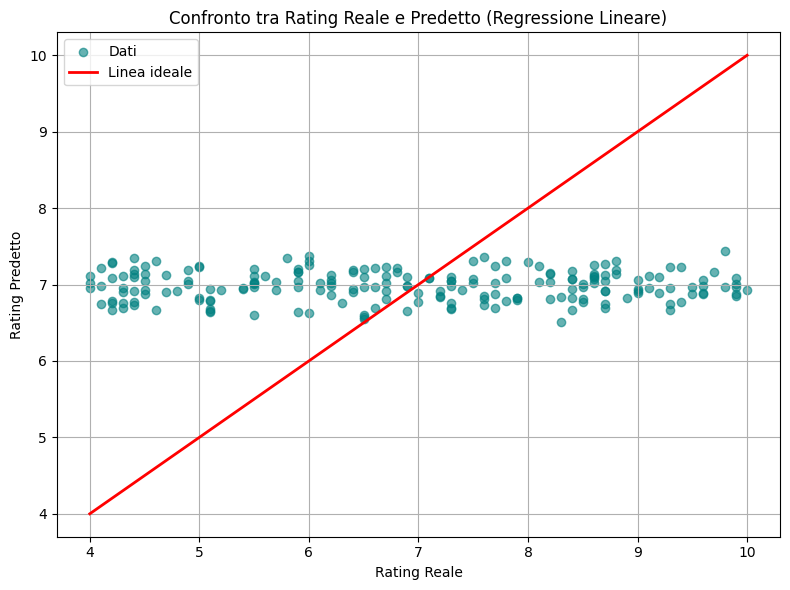

In [44]:
# training del modello con la linear regression
from sklearn.linear_model import LinearRegression

# Crea il modello di regressione lineare
regressor = LinearRegression()

# Allena il modello sui dati di training
regressor.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = regressor.predict(X_test)

# Mostra i primi 5 valori previsti a confronto con i reali
print("Valori reali del Rating:", y_test.values[:5])
print("Valori predetti del Rating:", y_pred[:5])

# Scatter plot: valori reali vs predetti
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', label="Dati")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Linea ideale")
plt.xlabel("Rating Reale")
plt.ylabel("Rating Predetto")
plt.title("Confronto tra Rating Reale e Predetto (Regressione Lineare)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcolo delle metriche
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.110187291026073 
MAE = 1.5229214208487527


# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

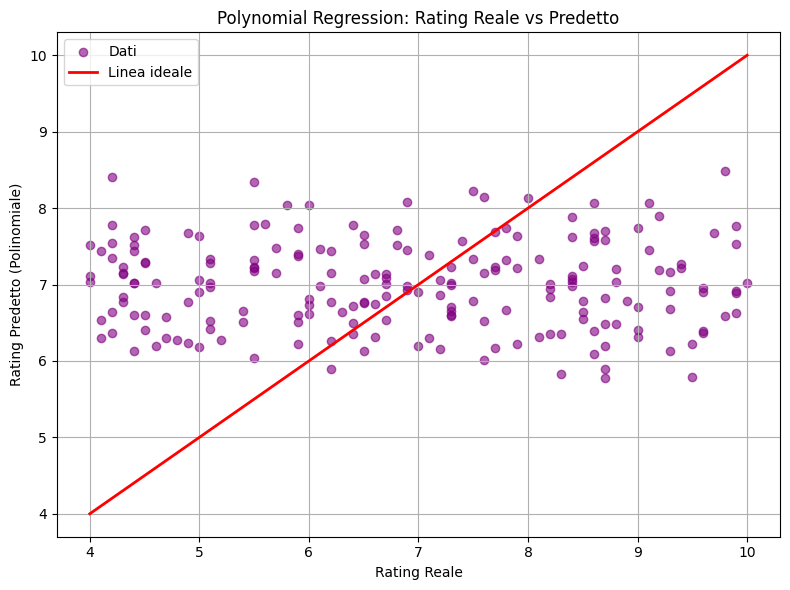

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# Scegliamo il grado del polinomio
poly_regressor = PolynomialFeatures(degree=2)

# Trasforma le feature in forma polinomiale
X_train_poly = poly_regressor.fit_transform(X_train)
X_test_poly = poly_regressor.transform(X_test)

# Crea e allena il modello
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Previsioni sui dati di test trasformati
y_pred_poly = regressor.predict(X_test_poly)

# Scatter plot: valori reali vs predetti
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='purple', label='Dati')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Linea ideale')
plt.xlabel("Rating Reale")
plt.ylabel("Rating Predetto (Polinomiale)")
plt.title("Polynomial Regression: Rating Reale vs Predetto")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

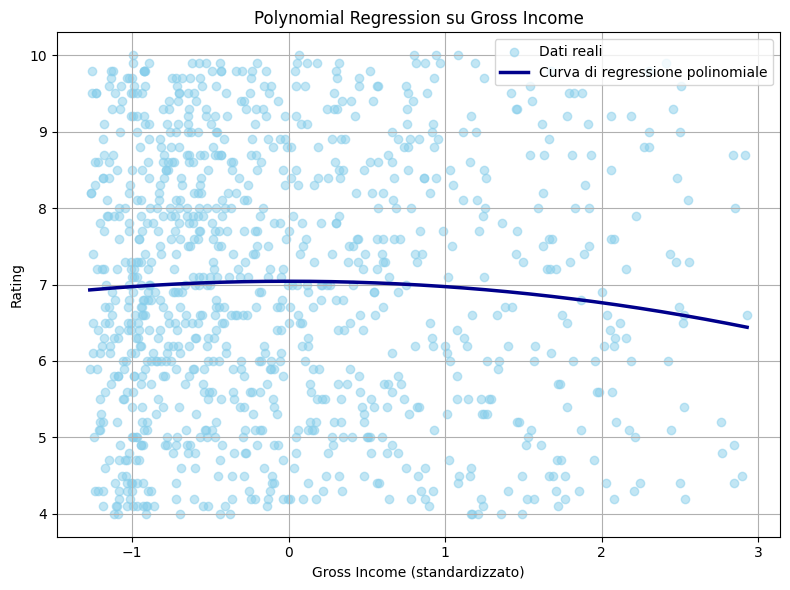

In [47]:
# Selezioniamo solo la colonna 'gross income' per X e 'Rating' per y
X_gross = dataset_encoded[['gross income']].values
y = dataset_encoded['Rating'].values

# Trasformazione polinomiale (grado 2)
poly_regressor = PolynomialFeatures(degree=2)
X_poly = poly_regressor.fit_transform(X_gross)

# Alleniamo il modello
regressor = LinearRegression()
regressor.fit(X_poly, y)

# Generiamo nuovi punti X per una curva più liscia
X_range = np.linspace(X_gross.min(), X_gross.max(), 300).reshape(-1, 1)
X_range_poly = poly_regressor.transform(X_range)
y_pred_range = regressor.predict(X_range_poly)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_gross, y, color='skyblue', label='Dati reali', alpha=0.5)
plt.plot(X_range, y_pred_range, color='darkblue', linewidth=2.5, label='Curva di regressione polinomiale')
plt.xlabel("Gross Income (standardizzato)")
plt.ylabel("Rating")
plt.title("Polynomial Regression su Gross Income")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE_poly = mean_squared_error(y_test, y_pred_poly)
MAE_poly = mean_absolute_error(y_test, y_pred_poly)

# Stampa i risultati
print(f"[Polynomial Regression di grado 2]")
print(f"MSE: {MSE_poly:.4f}")
print(f"MAE: {MAE_poly:.4f}")

[Polynomial Regression di grado 2]
MSE: 3.4526
MAE: 1.5693


In [48]:
#La regressione polinomiale, in questo caso, è andata peggio, c'è un errore maggiore in entrambi i casi, quindi vorrei fare una prova con un degree maggiore
# Crea l'oggetto PolynomialFeatures con grado diverso
poly_regressor = PolynomialFeatures(degree=3)

# Trasforma le feature di train e test in polinomiali
X_train_polynew = poly_regressor.fit_transform(X_train)
X_test_polynew = poly_regressor.transform(X_test)

# Crea e allena il modello di regressione lineare sui dati trasformati
regressor = LinearRegression()
regressor.fit(X_train_polynew, y_train)

# Effettua le predizioni
y_pred_polynew = regressor.predict(X_test_polynew)

# Valutazione del modello
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE_polynew = mean_squared_error(y_test, y_pred_polynew)
MAE_polynew = mean_absolute_error(y_test, y_pred_polynew)

# Stampa i risultati
print(f"[Polynomial Regression con Grado Diverso di Tipo 3]")
print(f"MSE: {MSE_polynew:.4f}")
print(f"MAE: {MAE_polynew:.4f}")

[Polynomial Regression con Grado Diverso di Tipo 3]
MSE: 5.3594
MAE: 1.8459


### *La regressione polinomiale non sembra funzionare bene, anzi sembra peggiorare dal grado 2 al grado 3 con rischio di overfitting, proverei dei modelli più complessi. Tra la lineare e la polinomiale direi che per ora la lineare creerebbe meno problemi*

# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [50]:
# codice per importare il dataset apple_quality
classification_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/apple_quality.csv', encoding='windows-1254')

Ti suggeriamo quindi  di printare le prime 50 righe...

In [52]:
# codice per print delle prime 50 righe
classification_dataset.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


... e dei metadati delle colonne:

In [55]:
# codice per visualizzare i principali metadata del dataset apple_quality
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4001 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [56]:
# Converti la colonna 'Acidity' in tipo float
classification_dataset['Acidity'] = pd.to_numeric(classification_dataset['Acidity'], errors='coerce')

# Verifica il tipo dopo la conversione
print(classification_dataset['Acidity'].dtype)

# Verifica di nuovo il dataset
print(classification_dataset.head())
classification_dataset.info()

float64
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality  
0 -0.491590        1  
1 -0.722809        1  
2  2.621636        0  
3  0.790723        1  
4  0.501984        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float

Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [54]:
# codice per effettuare l'enconding della label "Quality"
from sklearn.preprocessing import LabelEncoder

# Crea l'istanza del LabelEncoder
label_encoder = LabelEncoder()

# Applica l'encoding sulla colonna "Quality"
classification_dataset['Quality'] = label_encoder.fit_transform(classification_dataset['Quality'])

# Controlla i primi valori del DataFrame per verificare il cambiamento
print(classification_dataset.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity  Quality  
0  -0.491590483        1  
1  -0.722809367        1  
2   2.621636473        0  
3   0.790723217        1  
4   0.501984036        1  


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [68]:
# codice per splittare in train/test il dataset apple_quality
from sklearn.model_selection import train_test_split

# Separa le caratteristiche (X) e il target (y)
X = classification_dataset[['Size',	'Weight',	'Sweetness', 'Crunchiness',	'Juiciness',	'Ripeness',	'Acidity']]  # Caratteristiche
y = classification_dataset['Quality']  # Target

# Dividi il dataset in set di addestramento e test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica le dimensioni dei set
print(f"Dimensioni del train set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Dimensioni del test set: X_test={X_test.shape}, y_test={y_test.shape}")


Dimensioni del train set: X_train=(3200, 7), y_train=(3200,)
Dimensioni del test set: X_test=(800, 7), y_test=(800,)


Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [70]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

# Calcola l'accuratezza sul test set
accuracy = logistic_regressor.score(X_test, y_test)
print(f"Accuracy sul test set: {accuracy:.2f}")


Accuracy sul test set: 0.75


Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [71]:
from sklearn.metrics import classification_report

y_predict_test = logistic_regressor.predict(X_test)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

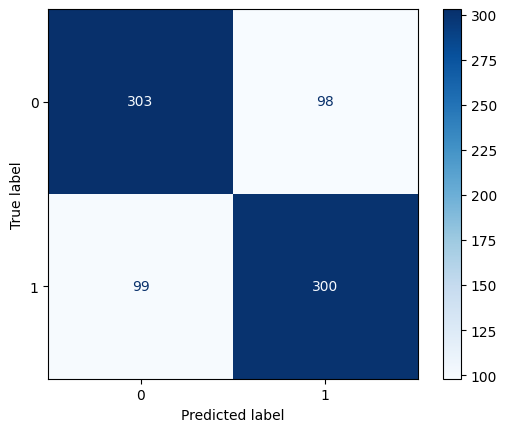

In [72]:
# codice per la confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcola la confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizza la confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

# Mostra la grafica
plt.show()

# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

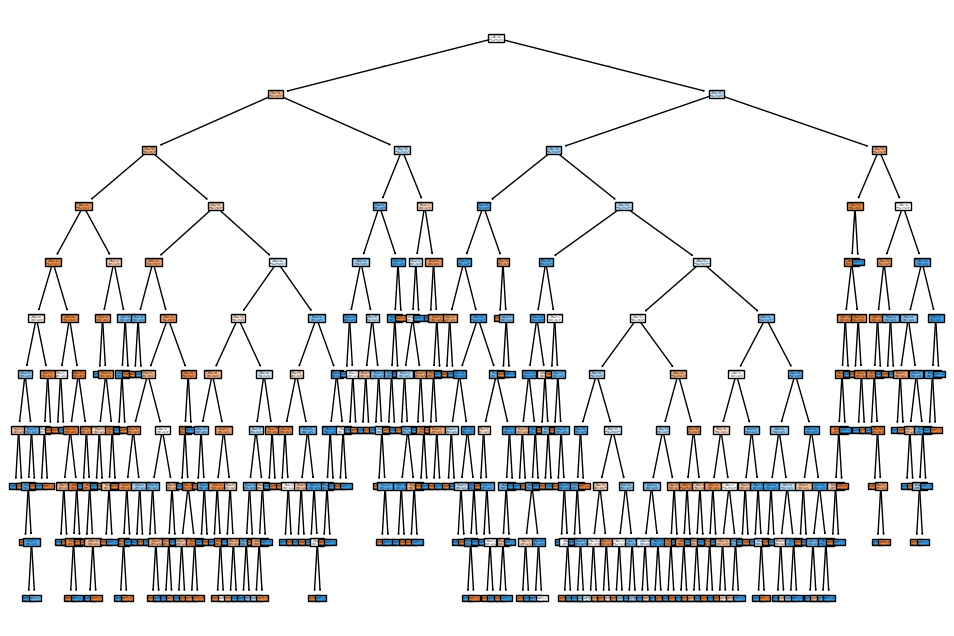

Accuracy del Decision Tree: 0.81


In [76]:
# training del modello con un decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Crea il modello di regressione lineare
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10)

# Allena il modello sui dati di training
decision_tree.fit(X_train, y_train)

# Predizioni sul test set
y_pred_tree = decision_tree.predict(X_test)

# Mostra il plot tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()

# Calcola e stampa l'accuratezza
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy del Decision Tree: {accuracy_tree:.2f}")

E poi alla costruzione della confusion matrix:

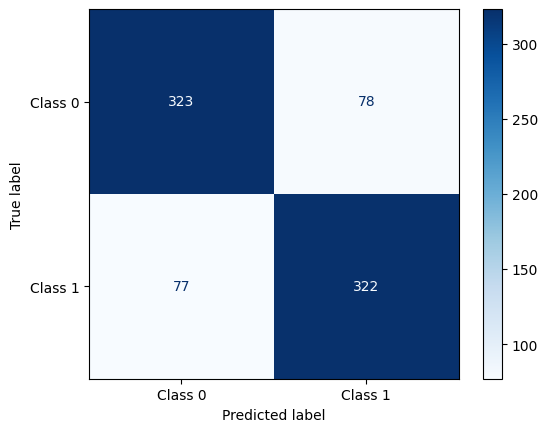

In [77]:
# confusion matrix del decision tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

### *Il Decision Tree ha mostrato un'accuratezza dell'81%, superiore al 75% della Logistic Regression, suggerendo che gestisce meglio la complessità dei dati. Inoltre, la Confusion Matrix indica che gli errori commessi dal Decision Tree sono minori rispetto a quelli della Logistic Regression, con un miglior bilanciamento tra le classi. Sebbene il Decision Tree sia un buon modello, l'accuratezza potrebbe essere ulteriormente migliorata esplorando modelli più complessi come Random Forests o Gradient Boosting, che combinano più alberi per una previsione più robusta e precisa.*

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

       Feature  Importance
5     Ripeness    0.221172
0         Size    0.172454
2    Sweetness    0.167050
6      Acidity    0.143360
4    Juiciness    0.132263
1       Weight    0.087988
3  Crunchiness    0.075713


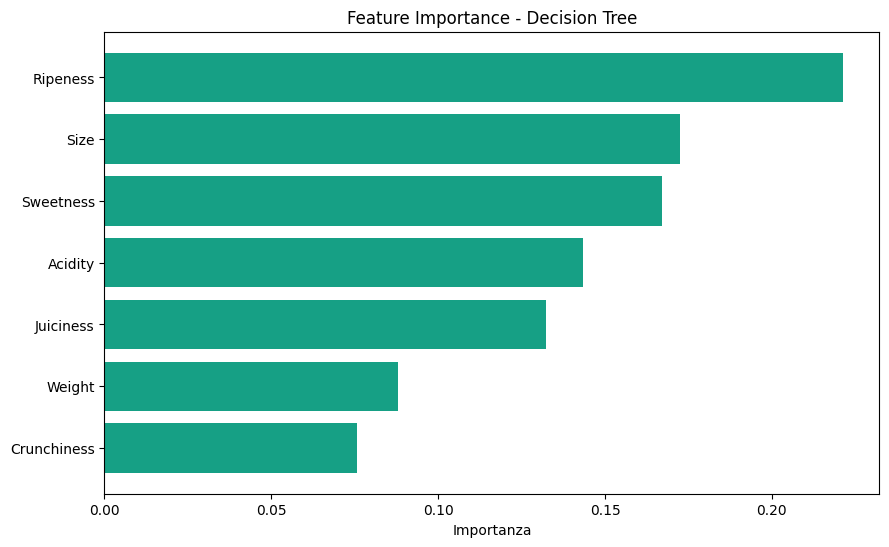

In [83]:
# codice per la feature importance
feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Crea un DataFrame per ordinare e visualizzare meglio
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizza la tabella
print(feature_importance_df)

# Grafico a barre della feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#16a085')
plt.xlabel('Importanza')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # Per avere la feature più importante in alto
plt.show()

# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [84]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])

# Se ci sono ancora valori nulli, rimuovili o imputali
clustering_dataset = clustering_dataset.dropna()

Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [88]:
# codice per trainare il modello con K-Means Clustering
from sklearn.cluster import KMeans

# Rimuovi la colonna 'A_id' dal dataset di clustering
clustering_dataset = classification_dataset.drop(columns=['Quality', 'A_id'])

# Se ci sono ancora valori nulli, rimuovili o imputali
clustering_dataset = clustering_dataset.dropna()

# Crea e addestra il modello K-Means con 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(clustering_dataset)

# Aggiungi le etichette dei cluster al dataset
clustering_dataset['Cluster'] = kmeans.labels_

# Visualizza i primi risultati
print(clustering_dataset.head())


       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

   Cluster  
0        1  
1        1  
2        0  
3        0  
4        0  


Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [101]:
import pandas as pd

# Definisci le feature del modello
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Crea il DataFrame della mela da classificare
sample_mela_df = pd.DataFrame([[7.0, 180.0, 8.5, 7.0, 6.0, 8.0, 3.5]], columns=features)

# Predizione del cluster
cluster_predetto = kmeans.predict(sample_mela_df)

print(f"La mela è stata assegnata al cluster: {cluster_predetto[0]}")


La mela è stata assegnata al cluster: 0


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

In [92]:
# Aggiungi la colonna 'Cluster' a 'classification_dataset' per avere i predetti dei cluster
classification_dataset['Cluster'] = kmeans.labels_

# Verifica la distribuzione delle etichette 'Quality' per ciascun cluster
cluster_quality_distribution = classification_dataset.groupby('Cluster')['Quality'].value_counts()
print(cluster_quality_distribution)


Cluster  Quality
0        1           979
         0           686
1        0          1310
         1          1025
Name: count, dtype: int64


*Cluster 0 contiene 979 mele buone e 686 mele cattive.*

*Cluster 1 contiene 1025 mele buone e 1310 mele cattive.*

*Cluster 0 potrebbe essere principalmente associato alle mele buone e Cluster 1 potrebbe essere associato alle mele cattive. Possiamo dire che la mela assegnata al Cluster 0 potrebbe essere buona perché questo cluster contiene un numero maggiore di mele buone rispetto alle mele cattive.*

*Provo invece a selezionare un modello con tre cluster che potrebbe includere una qualità intermedia di mele*

In [103]:
#info di classification_dataset
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
 9   Cluster      4000 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 328.1 KB


In [104]:
# Crea un nuovo dataset per i 3 cluster
clustering_dataset_3 = classification_dataset.drop(columns=['Quality', 'A_id','Cluster']).copy()

# Elimina eventuali valori nulli
clustering_dataset_3 = clustering_dataset_3.dropna()

# Crea e allena il modello K-Means con 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(clustering_dataset_3)

# Aggiungi i cluster predetti al dataset
clustering_dataset_3['Cluster'] = kmeans_3.labels_

# Mostra i primi risultati
print(clustering_dataset_3.head())

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

   Cluster  
0        1  
1        1  
2        2  
3        2  
4        2  


In [105]:
# Definisci le feature del modello
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Crea il DataFrame della mela da classificare
sample_mela_df = pd.DataFrame([[7.0, 180.0, 8.5, 7.0, 6.0, 8.0, 3.5]], columns=features)

# Predizione del cluster
cluster_predetto = kmeans_3.predict(sample_mela_df)

print(f"La mela è stata assegnata al cluster: {cluster_predetto[0]}")

La mela è stata assegnata al cluster: 0


In [110]:
# Ricrea un nuovo dataset con la colonna Quality reinserita
clustering_dataset_3new = clustering_dataset_3.copy()
clustering_dataset_3new['Quality'] = classification_dataset['Quality']

# Visualizza la distribuzione di qualità all'interno di ciascun cluster (3 cluster)
cluster_quality_distribution = clustering_dataset_3new.groupby('Cluster')['Quality'].value_counts()
print(cluster_quality_distribution)



Cluster  Quality
0        0          976
         1          527
1        1          743
         0          532
2        1          734
         0          488
Name: count, dtype: int64


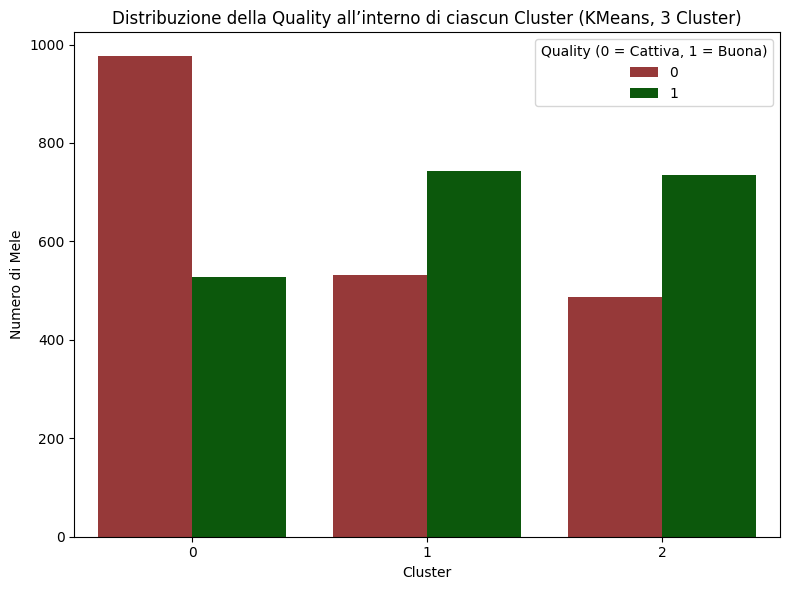

In [117]:
import seaborn as sns


# Prepara i dati
plot_data = clustering_dataset_3new.groupby(['Cluster', 'Quality']).size().reset_index(name='Count')

# Definisci una palette personalizzata
palette = {0: 'brown', 1: 'darkgreen'}  # marrone per mele cattive, verde per mele buone

# Grafico a barre con colori personalizzati
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Count', hue='Quality', data=plot_data, palette=palette)

plt.title('Distribuzione della Quality all’interno di ciascun Cluster (KMeans, 3 Cluster)')
plt.xlabel('Cluster')
plt.ylabel('Numero di Mele')
plt.legend(title='Quality (0 = Cattiva, 1 = Buona)', loc='upper right')
plt.tight_layout()
plt.show()


# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [122]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"
timeseries_dataset = regression_raw_dataset[['Date', 'gross income']]

Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [124]:
timeseries_dataset.head(100)
timeseries_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   gross income  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [125]:
# Convertire la colonna 'Date' in formato datetime
timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])
timeseries_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1000 non-null   datetime64[ns]
 1   gross income  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


<ipython-input-125-048ec67616ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])


A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

<ipython-input-129-88f810bab232>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries_dataset["Year"] = timeseries_dataset["Date"].dt.year
<ipython-input-129-88f810bab232>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries_dataset["Month"] = timeseries_dataset["Date"].dt.month
<ipython-input-129-88f810bab232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

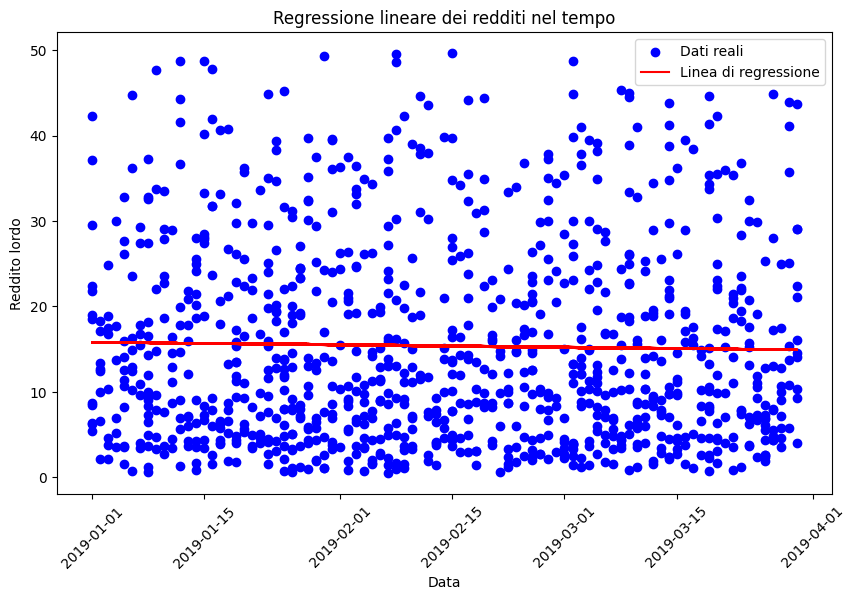

In [129]:
# training della time series con la linear regression

# Creare le colonne "Year", "Month", "Day"
timeseries_dataset["Year"] = timeseries_dataset["Date"].dt.year
timeseries_dataset["Month"] = timeseries_dataset["Date"].dt.month
timeseries_dataset["Day"] = timeseries_dataset["Date"].dt.day

# Creare X e y
X = timeseries_dataset[["Year", "Month", "Day"]]  # Variabili indipendenti
y = timeseries_dataset["gross income"]  # Variabile dipendente

# Creare e allenare il modello di regressione lineare
regressor = LinearRegression()
regressor.fit(X, y)

# Fare previsioni
y_pred = regressor.predict(X)

# Visualizzare lo scatter plot con la linea di regressione
plt.figure(figsize=(10, 6))
plt.scatter(timeseries_dataset["Date"], y, color='blue', label='Dati reali')  # Scatter dei dati reali
plt.plot(timeseries_dataset["Date"], y_pred, color='red', label='Linea di regressione')  # Linea di regressione
plt.xlabel('Data')
plt.ylabel('Reddito lordo')
plt.title('Regressione lineare dei redditi nel tempo')
plt.legend()
plt.xticks(rotation=45)
plt.show()

E vai a controllare le solite metriche, cioè MSE ed MAE:

In [130]:
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 136.88766950119015 
MAE = 9.61551025064516


Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [22]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
timeseries_datasetnew = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/supermarket_sales.csv', encoding='windows-1254')

In [10]:
#importa solo le colonne Date e gross income
timeseries_datasetnew = timeseries_datasetnew[['Date', 'gross income']]

In [11]:
timeseries_datasetnew.info()
timeseries_datasetnew.describe()
timeseries_datasetnew.head(10)
timeseries_datasetnew.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   gross income  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


,Date,gross income
990,3/22/2019,14.1400
991,1/24/2019,38.3000
992,3/10/2019,5.8030
993,2/22/2019,8.7450
994,2/18/2019,3.0475
995,1/29/2019,2.0175
996,3/2/2019,48.6900
997,2/9/2019,1.5920
998,2/22/2019,3.2910
999,2/18/2019,30.9190


In [12]:
timeseries_datasetnew.head(10)

,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085
5,3/25/2019,29.8865
6,2/25/2019,20.6520
7,2/24/2019,36.7800
8,1/10/2019,3.6260
9,2/20/2019,8.2260


In [14]:
# Creo una copia del dataframe
df = timeseries_datasetnew.copy()

In [15]:
# Modifico la colonna date in dateset visto che ora risulta object
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Selezione delle colonne rilevanti e aggregazione per giorno (somma del gross income per data)
daily_income = df.groupby("Date")["gross income"].sum().reset_index()

In [17]:
# Ordinamento cronologico
daily_income = daily_income.sort_values("Date")

daily_income.head()

,Date,gross income
0,2019-01-01,225.9610
1,2019-01-02,92.6430
2,2019-01-03,98.9585
3,2019-01-04,77.3185
4,2019-01-05,168.4135


In [18]:
# Feature engineering temporale
daily_income["day"] = daily_income["Date"].dt.day
daily_income["weekday"] = daily_income["Date"].dt.weekday  # 0=Monday, 6=Sunday
daily_income["month"] = daily_income["Date"].dt.month

# Lag features
daily_income["income_lag_1"] = daily_income["gross income"].shift(1)
daily_income["income_lag_7"] = daily_income["gross income"].shift(7)

# Rimozione dei NaN dovuti ai lag
daily_income_clean = daily_income.dropna()

daily_income_clean.head()

,Date,gross income,day,weekday,month,income_lag_1,income_lag_7
7,2019-01-08,252.0825,8,1,1,134.9640,225.9610
8,2019-01-09,143.8735,9,2,1,252.0825,92.6430
9,2019-01-10,169.5690,10,3,1,143.8735,98.9585
10,2019-01-11,100.7125,11,4,1,169.5690,77.3185
11,2019-01-12,246.8935,12,5,1,100.7125,168.4135


### *Nella sessione precedente ho diviso le colonne in giorni, mesi e anni e ho introdotto due lag, ovvero informazioni sul gross income del giorno precedente (lag_1) e di una settimana prima (lag_7) . Così facendo il modello dovrebbe capire dei cicli in base alla differenza tra il gross income di quel giorno e quello del giorno prima o di una settimana prima per predire poi il futuro. Ora procedo con il Train_test_split, dove le features saranno le varie caratteristiche temporali e gli income dei lag e il target è il gross income*

In [20]:
# Definizione delle feature e del target
features = ["day", "weekday", "month", "income_lag_1", "income_lag_7"]
target = "gross income"

X = daily_income_clean[features]
y = daily_income_clean[target]

# Divisione temporale 80/20
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Verifica delle dimensioni
X_train.shape, X_test.shape

((65, 5), (17, 5))

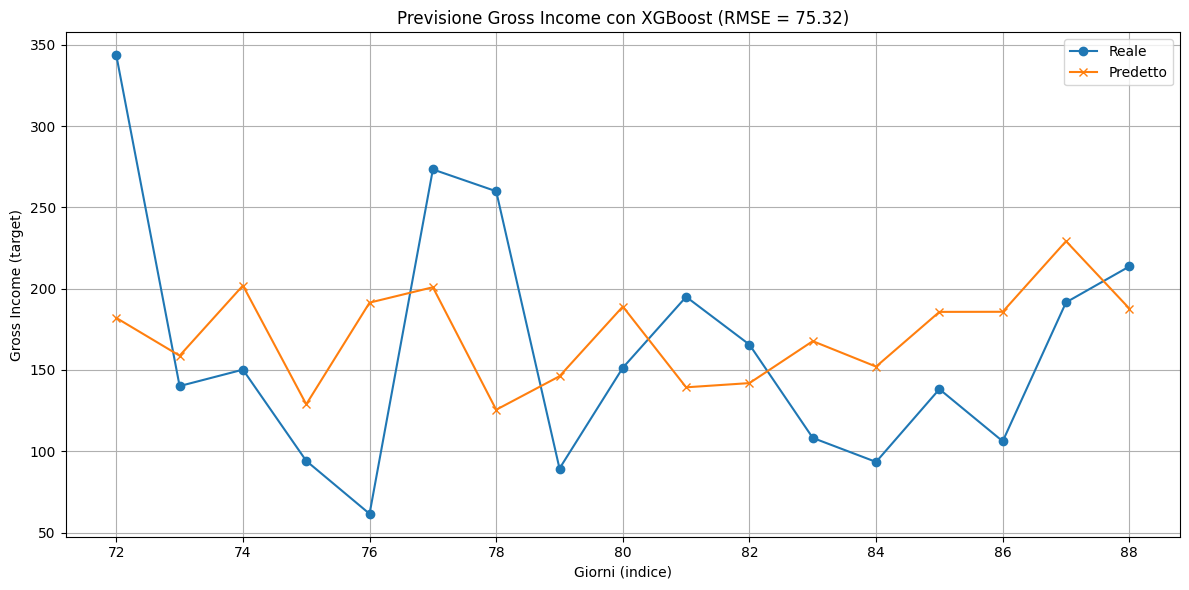

In [23]:
# Addestramento modello XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predizioni
y_pred = model.predict(X_test)

# Calcolo RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Grafico: valori reali vs predetti
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Reale", marker='o')
plt.plot(y_test.index, y_pred, label="Predetto", marker='x')
plt.title(f"Previsione Gross Income con XGBoost (RMSE = {rmse:.2f})")
plt.xlabel("Giorni (indice)")
plt.ylabel("Gross Income (target)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### *Calcolando l'RMSE si può notare come è ancora esistente il margine di errore, ma non è così eccessivo rispetto al range del gross income. Ovviamente si potrebbe sempre migliorare il modello considerando le festività o magari le varie branch del supermercato o ancora, aggiungengo più lag all'addestramento.*